In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\Machine Learning\car_price_prediction\car_price.csv')

df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
# Check missing values
missing = df.isnull().sum()
missing_percentage = round((missing/len(df))*100,2)
data_dict = {
"missing_values":missing,
"missing_values_percentage":missing_percentage}

missing_df = pd.DataFrame(data_dict)
missing_df

,missing_values,missing_values_percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [4]:
#Drop rows where target variables is missing
df['selling_price'].isnull().sum()

# # Drop rows where price is missing
# df = df.dropna(subset=['selling_price'], inPlace= True)

np.int64(0)

In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [6]:
# Fill missing values in the “mileage” column with the column’s mean.
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())

# Check if any missing values remain
print(df[['mileage(km/ltr/kg)']].isnull().sum())

mileage(km/ltr/kg)    0
dtype: int64


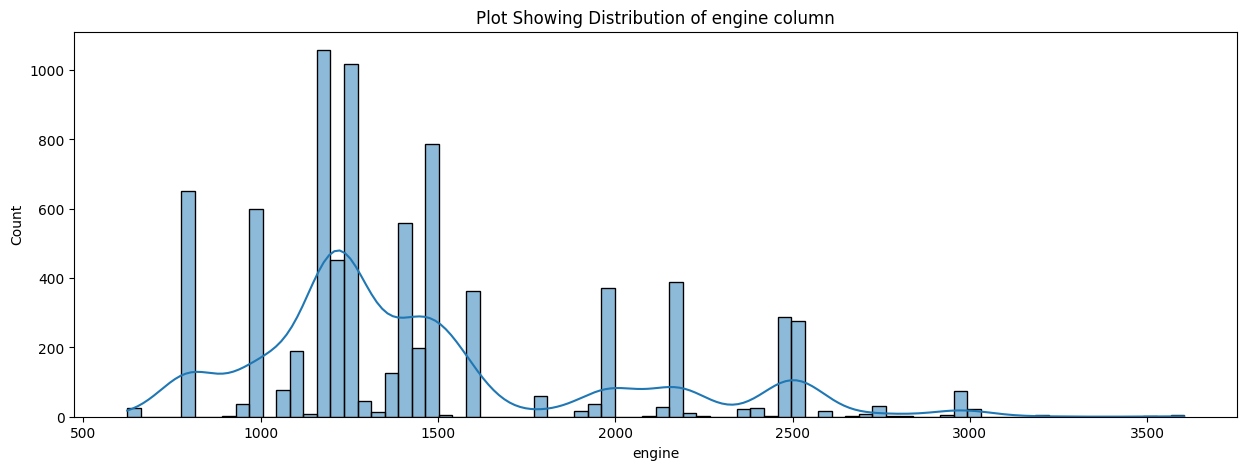

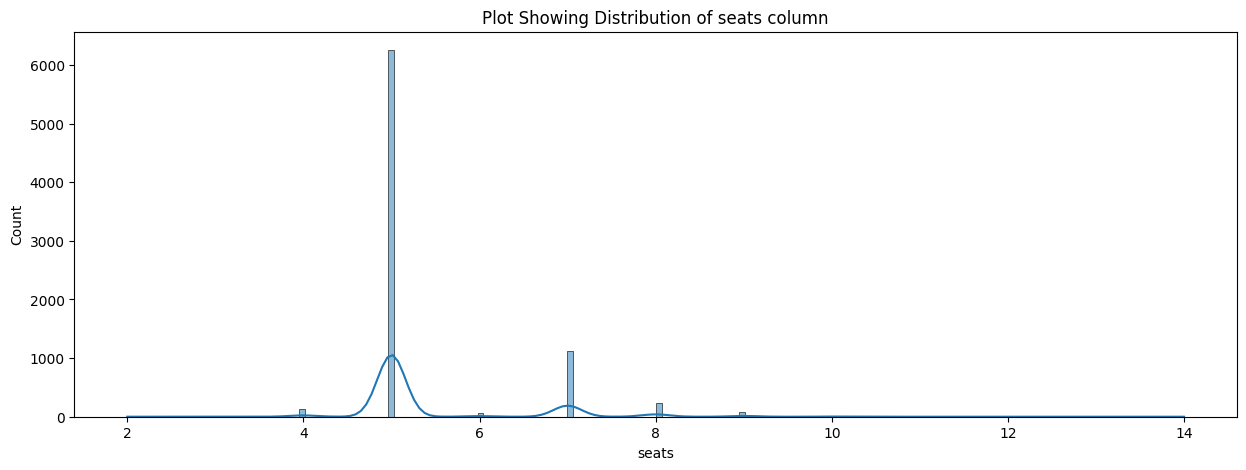

In [7]:
#Visualizing engine and seats
missing_columns = ['engine', 'seats']
for col in missing_columns:
    plt.figure(figsize=(15,5))
    sns.histplot(df, x=df[col], kde=True)
    plt.title(f'Plot Showing Distribution of {col} column')
    plt.xlabel(col)
    plt.show()

In [8]:
#Fill missing values with median
for col in missing_columns:
    df[col] =  df[col].fillna(df[col].median())
    print(f"Fill missing values for: {col}")
    print("*"*100)

df.isnull().sum()

Fill missing values for: engine
****************************************************************************************************
Fill missing values for: seats
****************************************************************************************************


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [9]:
df['max_power'].replace(['','nan',"None"," "], np.nan, inplace=True) 
df['max_power']

C:\Users\user\AppData\Local\Temp\ipykernel_15940\2014653536.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].replace(['','nan',"None"," "], np.nan, inplace=True)


0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8128, dtype: object

In [10]:
df[df['max_power'].apply(lambda x: x is None)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats


In [11]:
df['max_power'] = pd.to_numeric(df['max_power'])
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           7912 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [13]:
med = df['max_power'].mode()

print(med)

0    74.0
Name: max_power, dtype: float64


In [14]:
df['car_age'] = (2025 - df['year'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [15]:
df.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,12
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,11
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,12
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,18


In [16]:
# unique fuel type
df['fuel'].unique()


array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [17]:
# Replace inconsistent values in the “transmission” column
df['transmission'] = df['transmission'].str.capitalize()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


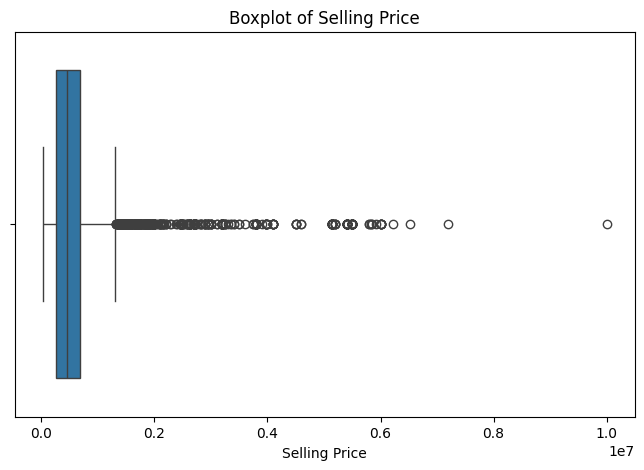

In [18]:
#Check if there are any outliers in the “selling price” column using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.xlabel('Selling Price')
plt.show()

In [19]:
# Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers)
df = df[(df['selling_price'] >= 10000) & (df['selling_price'] <= 5000000)]

In [20]:
#Standardize the column names so they are all lowercase and contain underscores instead of spaces
df.columns = (
    df.columns
    .str.strip()                     # Remove leading/trailing spaces
    .str.lower()                    # Make all lowercase
    .str.replace(' ', '_')          # Replace spaces with underscores
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8011 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8011 non-null   object 
 1   year                8011 non-null   int64  
 2   selling_price       8011 non-null   int64  
 3   km_driven           8011 non-null   int64  
 4   fuel                8011 non-null   object 
 5   seller_type         8011 non-null   object 
 6   transmission        8011 non-null   object 
 7   owner               8011 non-null   object 
 8   mileage(km/ltr/kg)  8011 non-null   float64
 9   engine              8011 non-null   float64
 10  max_power           7795 non-null   float64
 11  seats               8011 non-null   float64
 12  car_age             8011 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 876.2+ KB


In [21]:
# Check if any numerical columns are stored as strings and convert them to numbers.
string_cols = df.select_dtypes(include=['object']).columns

# Try converting each to numeric where possible
for col in string_cols:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Show columns that are still strings
df.select_dtypes(include=['object']).columns


C:\Users\user\AppData\Local\Temp\ipykernel_15940\3511831194.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [22]:
# Create a new column for “price per kilometer” by dividing the selling price by the mileage.
df['price_per_km'] = df['selling_price'] / df['mileage(km/ltr/kg)']

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [23]:
#Reset index
df.reset_index()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8006,8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,12,17297.297297
8007,8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,18,8035.714286
8008,8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,16,19792.746114
8009,8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,12,12303.775986


In [24]:
# save cleaned dataframe to CSV
df.to_csv('cleaned_car_price_data.csv', index=False)

In [25]:
# Find the average selling price of cars in the dataset.
average_price = df['selling_price'].mean()
print(f"Average selling price: {average_price:}")

Average selling price: 567656.2542753713


In [26]:
# Find the most common fuel type in the dataset
most_common_fuel = df['fuel'].mode()[0]
count = df['fuel'].value_counts()[most_common_fuel]

print(f"The most common fuel type is '{most_common_fuel}' with {count} cars.")

The most common fuel type is 'Diesel' with 4325 cars.


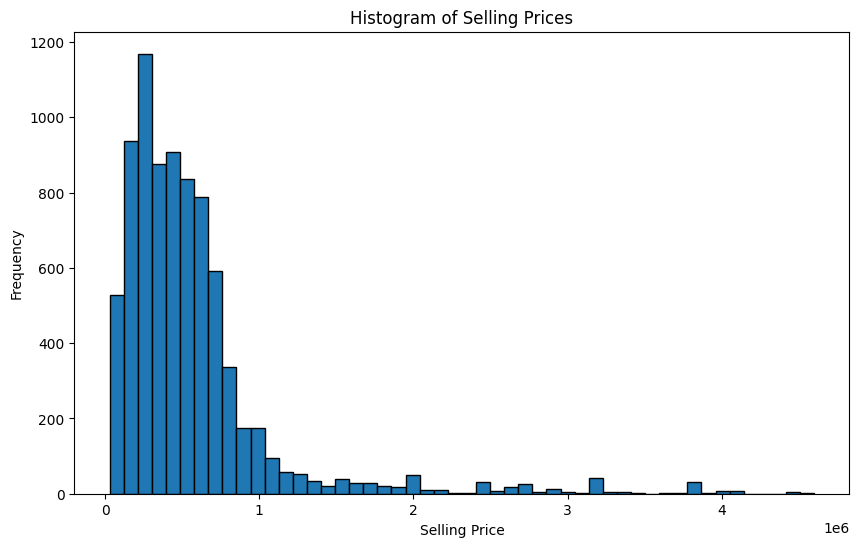

In [47]:
# Plot a histogram of the selling prices

plt.figure(figsize=(10,6))
plt.hist(df['selling_price'], bins=50, edgecolor='black')
plt.title("Histogram of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

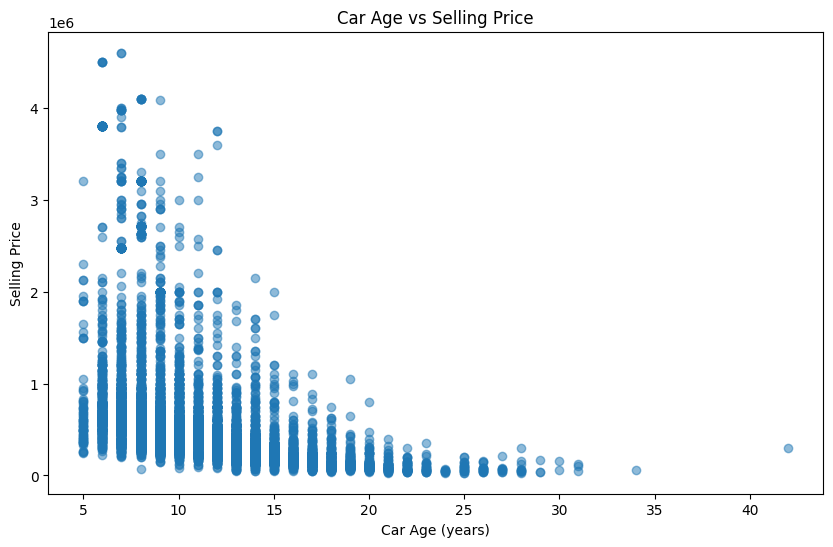

In [28]:
# Scatter plot of car age vs selling price

plt.figure(figsize=(10,6))
plt.scatter(df['car_age'], df['selling_price'], alpha=0.5)
plt.title("Car Age vs Selling Price")
plt.xlabel("Car Age (years)")
plt.ylabel("Selling Price")
plt.show()

Explanation

- Each blue dot represents a car.

- The x-axis shows the car’s age in years.

- The y-axis shows its selling price, (so differences between cheap and expensive cars are easier to see).

- The trend line slopes downward:
As cars get older, their selling price decreases.

In [29]:
# Group cars by fuel type and find the average selling price for each group.
avg_price_by_fuel = df.groupby('fuel')['selling_price'].mean().reset_index()
avg_price_by_fuel.columns = ['Fuel Type', 'Average Price']
avg_price_by_fuel['Average Price'] = avg_price_by_fuel['Average Price'].round(2)

print(avg_price_by_fuel)

  Fuel Type  Average Price
0       CNG      301017.49
1    Diesel      706997.86
2       LPG      200421.05
3    Petrol      407951.68


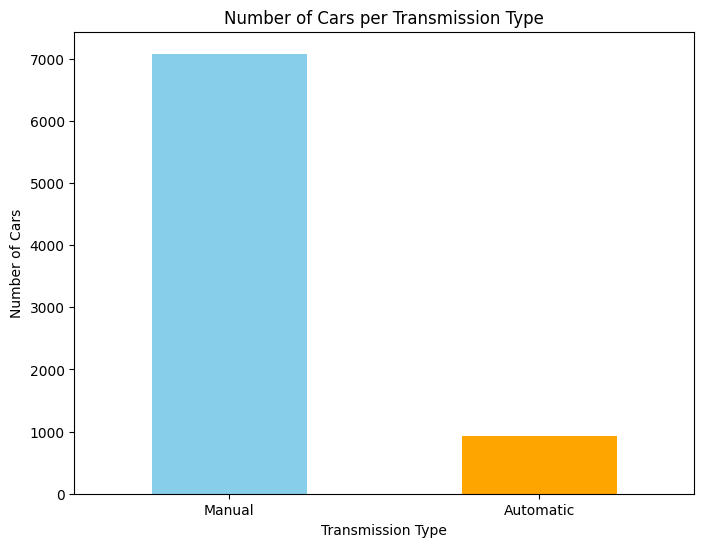

In [49]:
# Plot a bar chart showing the number of cars per transmission type.
# Count cars by transmission type
transmission_counts = df['transmission'].value_counts()


plt.figure(figsize=(8,6))
transmission_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Number of Cars per Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.xticks(rotation=0)
plt.show()

In [31]:
# Find the car with the highest mileage in the dataset.
highest_mileage = df['mileage(km/ltr/kg)'].max()

print(highest_mileage)

33.44


In [32]:
#Calculate the correlation between mileage and selling price.
correlation = df['mileage(km/ltr/kg)'].corr(df['selling_price'])
print(f"Correlation between mileage and selling price: {correlation:.4f}")

Correlation between mileage and selling price: -0.1539


A negative correlation:

Cars with higher mileage (driven more) tend to have a lower selling price.

Cars with lower mileage (driven less) tend to have a higher selling price.

- The more a car has been driven, the cheaper it usually sells for

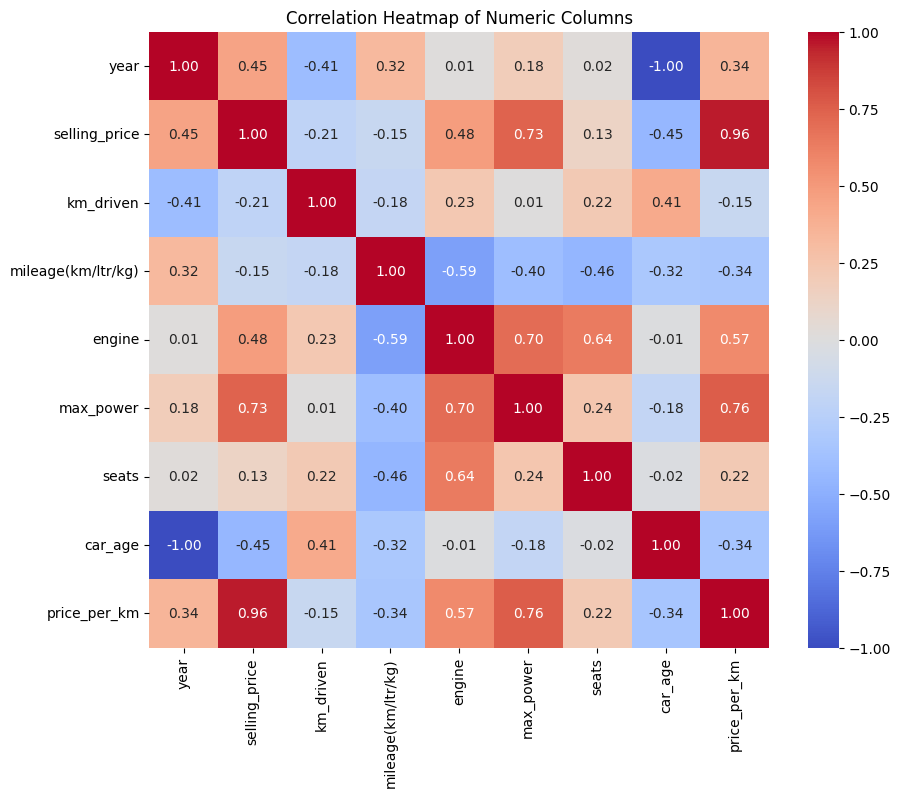

In [33]:
#Plot a heatmap showing the correlations between all numeric columns
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

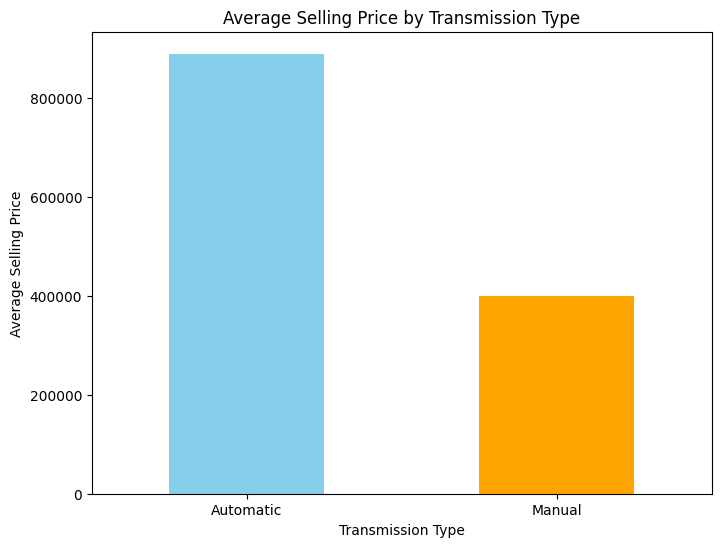

In [34]:
# Check if manual cars are generally cheaper or more expensive than automatic cars.

# Median selling price per transmission type
median_prices = df.groupby('transmission')['selling_price'].median()

plt.figure(figsize=(8,6))
median_prices.plot(kind='bar', color=['skyblue','orange'])
plt.title("Average Selling Price by Transmission Type")
plt.ylabel("Average Selling Price")
plt.xlabel("Transmission Type")
plt.xticks(rotation=0)
plt.show()

Automatic cars are generally more expensive than manual cars in the dataset.

This makes sense in practice: automatics are often found in newer, higher-end, or luxury vehicles, while manuals are more common in budget and older models.

In [35]:
# Group by year and calculate average selling price
avg_price_per_year = df.groupby('year')['selling_price'].mean().sort_index()

print("Average Selling Price by Year of Manufacture:")
print(avg_price_per_year)

Average Selling Price by Year of Manufacture:
year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     75833.333333
2000     93041.545455
2001     48498.300000
2002     98999.962963
2003     95636.693878
2004    110965.403226
2005    141159.783505
2006    163904.411290
2007    177718.213115
2008    207488.387850
2009    226434.914634
2010    272621.791878
2011    323775.293919
2012    351164.324117
2013    460005.920896
2014    516193.172303
2015    596613.349227
2016    699880.060536
2017    860220.106614
2018    915324.975000
2019    996480.133612
2020    798767.082192
Name: selling_price, dtype: float64


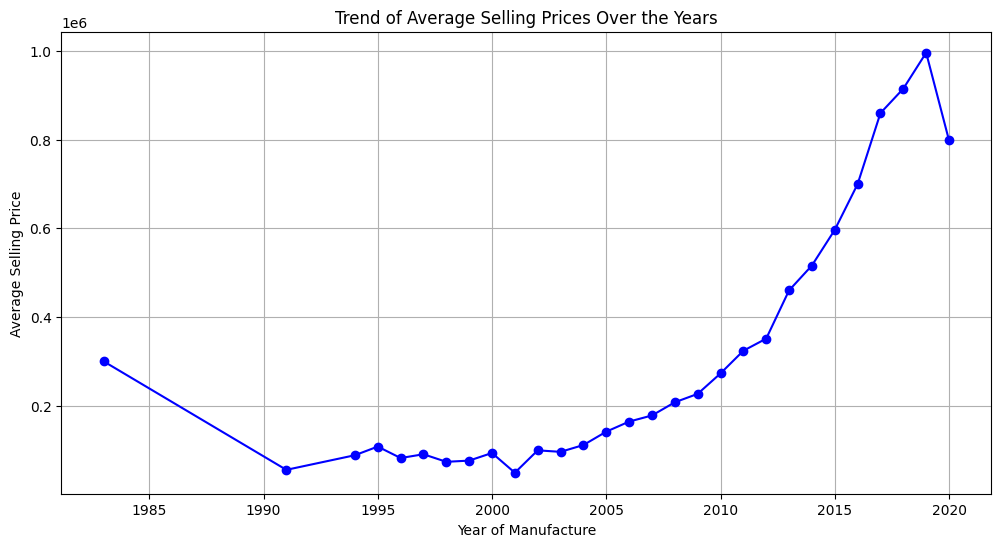

In [36]:
# Plot a line chart showing the trend of selling prices over the years.

# Group by year and calculate average selling price
avg_price_per_year = df.groupby('year')['selling_price'].mean().sort_index()

# Plot line chart
plt.figure(figsize=(12,6))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='o', linestyle='-', color='blue')
plt.title("Trend of Average Selling Prices Over the Years")
plt.xlabel("Year of Manufacture")
plt.ylabel("Average Selling Price")
plt.grid(True)
plt.show()

In [37]:
# Find the most expensive car for each fuel type.
idx = df.groupby('fuel')['selling_price'].idxmax()

# Select those rows
most_expensive_per_fuel = df.loc[idx, ['fuel', 'name', 'selling_price']]

print(most_expensive_per_fuel)

        fuel                                      name  selling_price
5749     CNG     Maruti Ertiga VXI CNG Limited Edition         545000
288   Diesel  Mercedes-Benz GL-Class 220d 4MATIC Sport        4600000
3042     LPG               Hyundai i10 Sportz 1.1L LPG         375000
134   Petrol           Jeep Wrangler 2016-2019 3.6 4X4        4100000


In [38]:
# Find out which brand appears most frequently in the dataset.
df['brand'] = df['name'].str.split(' ').str[0].str.lower()

# Find the most frequent brand
most_common_brand = df['brand'].mode()[0]
count = df['brand'].value_counts()[most_common_brand]

print(f"The most common brand is '{most_common_brand}' with {count} cars.")


The most common brand is 'maruti' with 2448 cars.


In [39]:
# Check the top 5 most common combinations of fuel type and transmission
top_combinations = (
    df.groupby(['fuel', 'transmission'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)  # sort from top to bottom
    .head(5)
    .reset_index(drop=True)  # reset index for numbering
)

# Add rank numbers 1–5
top_combinations.index = top_combinations.index + 1

print("Top 5 most common Fuel + Transmission combinations:")
print(top_combinations)

Top 5 most common Fuel + Transmission combinations:
     fuel transmission  count
1  Diesel       Manual   3868
2  Petrol       Manual   3115
3  Petrol    Automatic    476
4  Diesel    Automatic    457
5     CNG       Manual     57


In [40]:
# Select features (numeric + categorical)
X = df[['car_age', 'km_driven', 'engine', 
        'fuel', 'transmission', 'max_power']]

# Target variable
y = df['selling_price']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['fuel', 'transmission'], drop_first=True)

# Handle missing values
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("\nR² Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Intercept: 598839.3241351576
Coefficients: [-3.82364344e+04 -8.63479245e-01  2.13111396e+01  8.85699894e+03
  6.68418962e+04  1.19471202e+05 -6.67862098e+04 -4.19851544e+05]

R² Score: 0.6789933178226388
Mean Squared Error: 91248828711.90527
Root Mean Squared Error: 302074.21060379397


# Model Performance Linear Regression
R² Score = 0.679 (~68%)

The model explains about 68% of the variance in selling price.

MSE = 9.12 × 10¹⁰

Large error due to the scale of prices (cars are in lakhs/millions).

RMSE = 302,074

In [50]:
# Lasso Regression
lasso_model = Lasso(alpha=1000, max_iter=10000, random_state=42)  
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("\nLasso Regression:")
print("R² Score:", lasso_r2)
print("RMSE:", lasso_rmse)



Lasso Regression:
R² Score: 0.6794799790771693
RMSE: 301845.1443842611


In [ ]:
# Train Ridge Regression
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluation
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge Regression:")
print("Intercept:", ridge.intercept_)
print("R² Score:", r2_ridge)
print("RMSE:", rmse_ridge)
print("Number of coefficients:", np.sum(ridge.coef_ != 0))

Ridge Regression:
Intercept: 223763.25715716206
R² Score: 0.6664926110790272
RMSE: 307899.7546957978
Number of coefficients: 8


# Models Performances
Linear Regression is still decent, but Lasso balances accuracy + feature selection.

Lasso Regression performed the best in the dataset (highest R², lowest RMSE).

Ridge underperformed slightly possibly because the dataset has features where some should be shrunk (Lasso) rather than just reduced (Ridge).

In [ ]:
# Define Ridge model
ridge = Ridge(alpha=1.0)

# Use 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation R² scores
cv_r2 = cross_val_score(ridge, X, y, cv=kf, scoring='r2')

# Cross-validation RMSE
cv_mse = cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and take sqrt for RMSE
cv_rmse = np.sqrt(-cv_mse)

print("Cross-validation R² scores:", cv_r2)
print("Mean R²:", np.mean(cv_r2))

print("\nCross-validation RMSE scores:", cv_rmse)
print("Mean RMSE:", np.mean(cv_rmse))

Cross-validation R² scores: [0.67903058 0.67906737 0.67011893 0.6972406  0.71117191]
Mean R²: 0.687325875980354

Cross-validation RMSE scores: [302056.68018794 311029.71960048 320861.7356636  328793.29655324
 289552.92430535]
Mean RMSE: 310458.87126211973


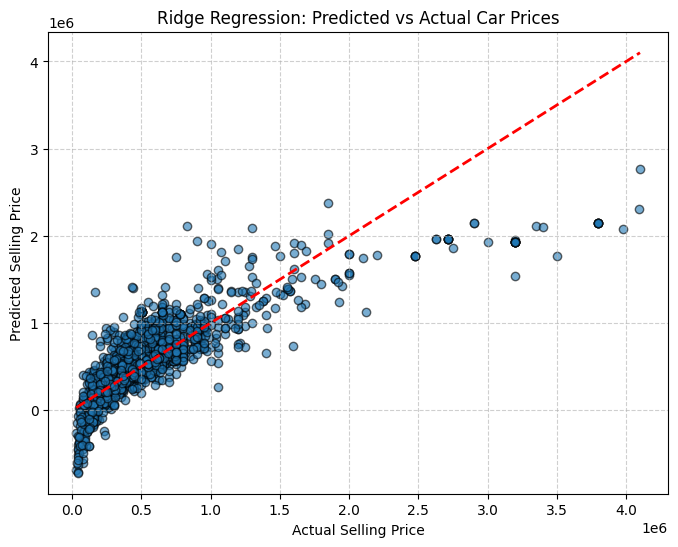

In [ ]:
# Train Ridge model
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = model_ridge.predict(X_test)

# Scatter plot of Actual vs Predicted

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Ridge Regression: Predicted vs Actual Car Prices")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:

# Define Ridge model
ridge = Ridge()

# Define parameter grid (alphas to try)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000]}

# Setup GridSearchCV
grid_search = GridSearchCV(
    ridge, 
    param_grid, 
    cv=5,
    scoring='r2',    
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best cross-validation R²:", grid_search.best_score_)

# Evaluate on test set
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Test R² Score:", r2)
print("Test RMSE:", rmse)


Best alpha: 1
Best cross-validation R²: 0.6848896792269845
Test R² Score: 0.6790305750074382
Test RMSE: 302056.6801879352


In [ ]:
#Polynomial Regression 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial transformation (degree=2 as a start)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Linear Regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluation
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Polynomial Regression (degree=2)")
print("R² Score:", r2_poly)
print("RMSE:", rmse_poly)
print("Number of polynomial features:", X_train_poly.shape[1])

Polynomial Regression (degree=2)
R² Score: 0.8657049125561903
RMSE: 195382.9560338301
Number of polynomial features: 44


Best Performing Model

Polynomial Regression (degree=2) is the best.

It explains ~86.6% of the variance vs ~68% for the linear models.

It reduced error by ~35% (195k vs 302k RMSE).

This means car prices depend on nonlinear relationships and feature interactions (e.g., age × mileage, engine², etc.), which Polynomial Regression can capture while simple linear models cannot.